# Мартьянова Александра Евгеньевна, курс «Data Science», ВКР

# Часть 1. Статистические модели

### Загрузка библиотек

In [1]:
# Загрузка разных библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from scipy.stats import f_oneway
from scipy.interpolate import interp1d

### 1. Подготовка и предобработка данных

Для обработки следует оставить первые 23 строки, поскольку остальные строки состоят из случайных чисел с нормальным распределением, недостающие данные получены путем интерполяции данных специально подготовленного датасета

###### Датасет со свойствами композитов

Загрузка специально подготовленного датасета для дальнейшей интерполяции:

In [2]:
# Загрузка в объект DataFrame файла 'X_bp&X_nup.xlsx', метод read_excel
df_s = pd.read_excel('X_bp&X_nup.xlsx', index_col = 0)
df_s.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.0,22.267857,100.0,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [3]:
# Вывод сведений о новом объекте DataFrame df_s, метод info()
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1100
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       23 non-null     float64
 1   Плотность, кг/м3                      23 non-null     float64
 2   модуль упругости, ГПа                 23 non-null     float64
 3   Количество отвердителя, м.%           23 non-null     float64
 4   Содержание эпоксидных групп,%_2       23 non-null     float64
 5   Температура вспышки, С_2              23 non-null     float64
 6   Поверхностная плотность, г/м2         23 non-null     float64
 7   Модуль упругости при растяжении, ГПа  23 non-null     float64
 8   Прочность при растяжении, МПа         23 non-null     float64
 9   Потребление смолы, г/м2               23 non-null     float64
 10  Угол нашивки, град                    1101 non-null   int64  
 11  Шаг нашивки      

In [4]:
# Изменение типа данных индекса, метод astype('int')
df_s.index = df_s.index.astype('int')
df_s

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.000000,3000.000000,220.0,0,4.0,57.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN
1097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN
1098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN
1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN


Вывод: индексы - целые числа

In [5]:
# Проверка наличия пропусков типа NULL и NaN в объекте DataFrame, методы isnull(), isna() и sum()
print(df_s.isnull().sum())
print()
print(df_s.isna().sum())

Соотношение матрица-наполнитель         1078
Плотность, кг/м3                        1078
модуль упругости, ГПа                   1078
Количество отвердителя, м.%             1078
Содержание эпоксидных групп,%_2         1078
Температура вспышки, С_2                1078
Поверхностная плотность, г/м2           1078
Модуль упругости при растяжении, ГПа    1078
Прочность при растяжении, МПа           1078
Потребление смолы, г/м2                 1078
Угол нашивки, град                         0
Шаг нашивки                             1078
Плотность нашивки                       1078
dtype: int64

Соотношение матрица-наполнитель         1078
Плотность, кг/м3                        1078
модуль упругости, ГПа                   1078
Количество отвердителя, м.%             1078
Содержание эпоксидных групп,%_2         1078
Температура вспышки, С_2                1078
Поверхностная плотность, г/м2           1078
Модуль упругости при растяжении, ГПа    1078
Прочность при растяжении, МПа           1

Вывод: датасете присутствует большое количество пропусков со значениями 'NaN', эти пропуски необходимо будет заполнить данными в результате интерполяции

In [6]:
# Проверка наличия дубликатов в объекте DataFrame, методы duplicated() и sum()
df_s.duplicated().sum()

1076

Вывод: имеются дубликаты в датасете, которые представляют собой строки с ячеями заполненными в основном 'NaN'

In [7]:
# Определение количества строк и столбцов датасета df_s, метод shape
df_s.shape

(1101, 13)

In [8]:
# Проверка количества уникальных значений в каждом столбце датасета df_s, метод nunique()
df_s.nunique()

Соотношение матрица-наполнитель         14
Плотность, кг/м3                        13
модуль упругости, ГПа                   20
Количество отвердителя, м.%              5
Содержание эпоксидных групп,%_2          4
Температура вспышки, С_2                 3
Поверхностная плотность, г/м2            4
Модуль упругости при растяжении, ГПа     4
Прочность при растяжении, МПа            4
Потребление смолы, г/м2                  3
Угол нашивки, град                       2
Шаг нашивки                              6
Плотность нашивки                        5
dtype: int64

Вывод: в колонке 'Угол нашивки, град' всего два значения, в остальных столбцах больше

In [9]:
# Определение уникальных значений в столбце 'Угол нашивки, град', метод unique()
df_s['Угол нашивки, град'].unique()

array([ 0, 90], dtype=int64)

In [10]:
# Подсчет количества строк по уникальным значениям столбца 'Угол нашивки, град', метод count()
df_s['Угол нашивки, град'][df_s['Угол нашивки, град'] == 0.0].count()

951

In [11]:
print('count, 0 degeree: ', df_s['Угол нашивки, град'][df_s['Угол нашивки, град'] == 0.0].count())
print('count, 90 degeree: ', df_s['Угол нашивки, град'][df_s['Угол нашивки, град'] == 90.0].count())
print('count, 90 degeree, проверка: ', df_s.shape[0] - df_s['Угол нашивки, град'][df_s['Угол нашивки, град'] == 0.0].count())

count, 0 degeree:  951
count, 90 degeree:  150
count, 90 degeree, проверка:  150


In [12]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
df_s.dtypes['Угол нашивки, град']

dtype('int64')

In [13]:
# Изменение типа данных столбца 'Угол нашивки, град', метод astype('int')
df_s['Угол нашивки, град'] = df_s['Угол нашивки, град'].astype(int)

In [14]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
df_s.dtypes['Угол нашивки, град']

dtype('int32')

Интерполяция данных:

In [15]:
# интерполяция недостающими данными, метод interpolate библиотеки scipy.interpolate
interpolate_columns = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 
                       'модуль упругости, ГПа', 'Количество отвердителя, м.%', 
                       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 
                       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 
                       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 'Шаг нашивки', 
                       'Плотность нашивки']
for col in interpolate_columns:
    df_s[col] = df_s[col].interpolate(limit_direction = 'both', kind = 'cubic')    

In [16]:
df_s.head(30)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.00
1,1.857143,2030.0,738.736842,30.4,22.297500,103.692308,210.0,70.0,3000.0,220.0,0,4.0,57.06
2,1.857143,2030.0,738.736842,30.8,22.327143,107.384615,210.0,70.0,3000.0,220.0,0,4.0,57.12
3,1.857143,2030.0,738.736842,31.2,22.356786,111.076923,210.0,70.0,3000.0,220.0,0,4.0,57.18
4,1.857143,2030.0,738.736842,31.6,22.386429,114.769231,210.0,70.0,3000.0,220.0,0,4.0,57.24
5,1.857143,2030.0,738.736842,32.0,22.416071,118.461538,210.0,70.0,3000.0,220.0,0,4.0,57.30
6,1.857143,2030.0,738.736842,32.4,22.445714,122.153846,210.0,70.0,3000.0,220.0,0,4.0,57.36
7,1.857143,2030.0,738.736842,32.8,22.475357,125.846154,210.0,70.0,3000.0,220.0,0,4.0,57.42
8,1.857143,2030.0,738.736842,33.2,22.505000,129.538462,210.0,70.0,3000.0,220.0,0,4.0,57.48
9,1.857143,2030.0,738.736842,33.6,22.534643,133.230769,210.0,70.0,3000.0,220.0,0,4.0,57.54


Проверка качества интерполяции

In [17]:
pd.set_option('use_inf_as_na', True)
for col in interpolate_columns:
    print(col, 'Inf+Nan: ', df_s[col].isnull().sum())

Соотношение матрица-наполнитель Inf+Nan:  0
Плотность, кг/м3 Inf+Nan:  0
модуль упругости, ГПа Inf+Nan:  0
Количество отвердителя, м.% Inf+Nan:  0
Содержание эпоксидных групп,%_2 Inf+Nan:  0
Температура вспышки, С_2 Inf+Nan:  0
Поверхностная плотность, г/м2 Inf+Nan:  0
Модуль упругости при растяжении, ГПа Inf+Nan:  0
Прочность при растяжении, МПа Inf+Nan:  0
Потребление смолы, г/м2 Inf+Nan:  0
Шаг нашивки Inf+Nan:  0
Плотность нашивки Inf+Nan:  0


In [18]:
# Описательная статистика датасета df_s, метод describe()
df_s.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,2.918634,1979.750227,741.334528,113.681589,22.267857,288.723538,475.785649,73.407508,2443.440307,220.000000,12.261580,6.543143,55.843324
std,0.783850,62.279796,287.558268,24.568710,2.041260,25.239693,287.199572,2.969528,460.449280,50.335168,30.887901,2.491736,11.484472
min,1.598174,1880.000000,205.000000,30.000000,21.250000,100.000000,210.000000,70.000000,1800.000000,120.000000,0.000000,0.000000,0.000000
25%,2.327459,1926.400000,549.160000,111.860000,21.250000,284.615385,210.000000,70.000000,2000.000000,220.000000,0.000000,4.080000,52.600000
50%,2.884130,1973.400000,738.736842,123.515200,21.575714,296.000000,380.000000,73.333333,2455.555556,220.000000,0.000000,7.000000,58.080000
75%,3.494317,2030.000000,799.920000,129.000000,22.267857,300.000000,644.600000,75.720000,3000.000000,231.200000,0.000000,9.000000,62.000000
max,4.897959,2160.000000,1628.000000,129.000000,33.000000,300.000000,1010.000000,78.000000,3000.000000,300.000000,90.000000,10.000000,70.000000


In [19]:
# Проверка наличия дубликатов в объекте DataFrame, методы duplicated() и sum()
df_s.duplicated().sum()

0

Вывод: дубликаты отсутствуют

###### Построение графиков рассеяния и распределения переменных, а также графиков "ящики с усами"

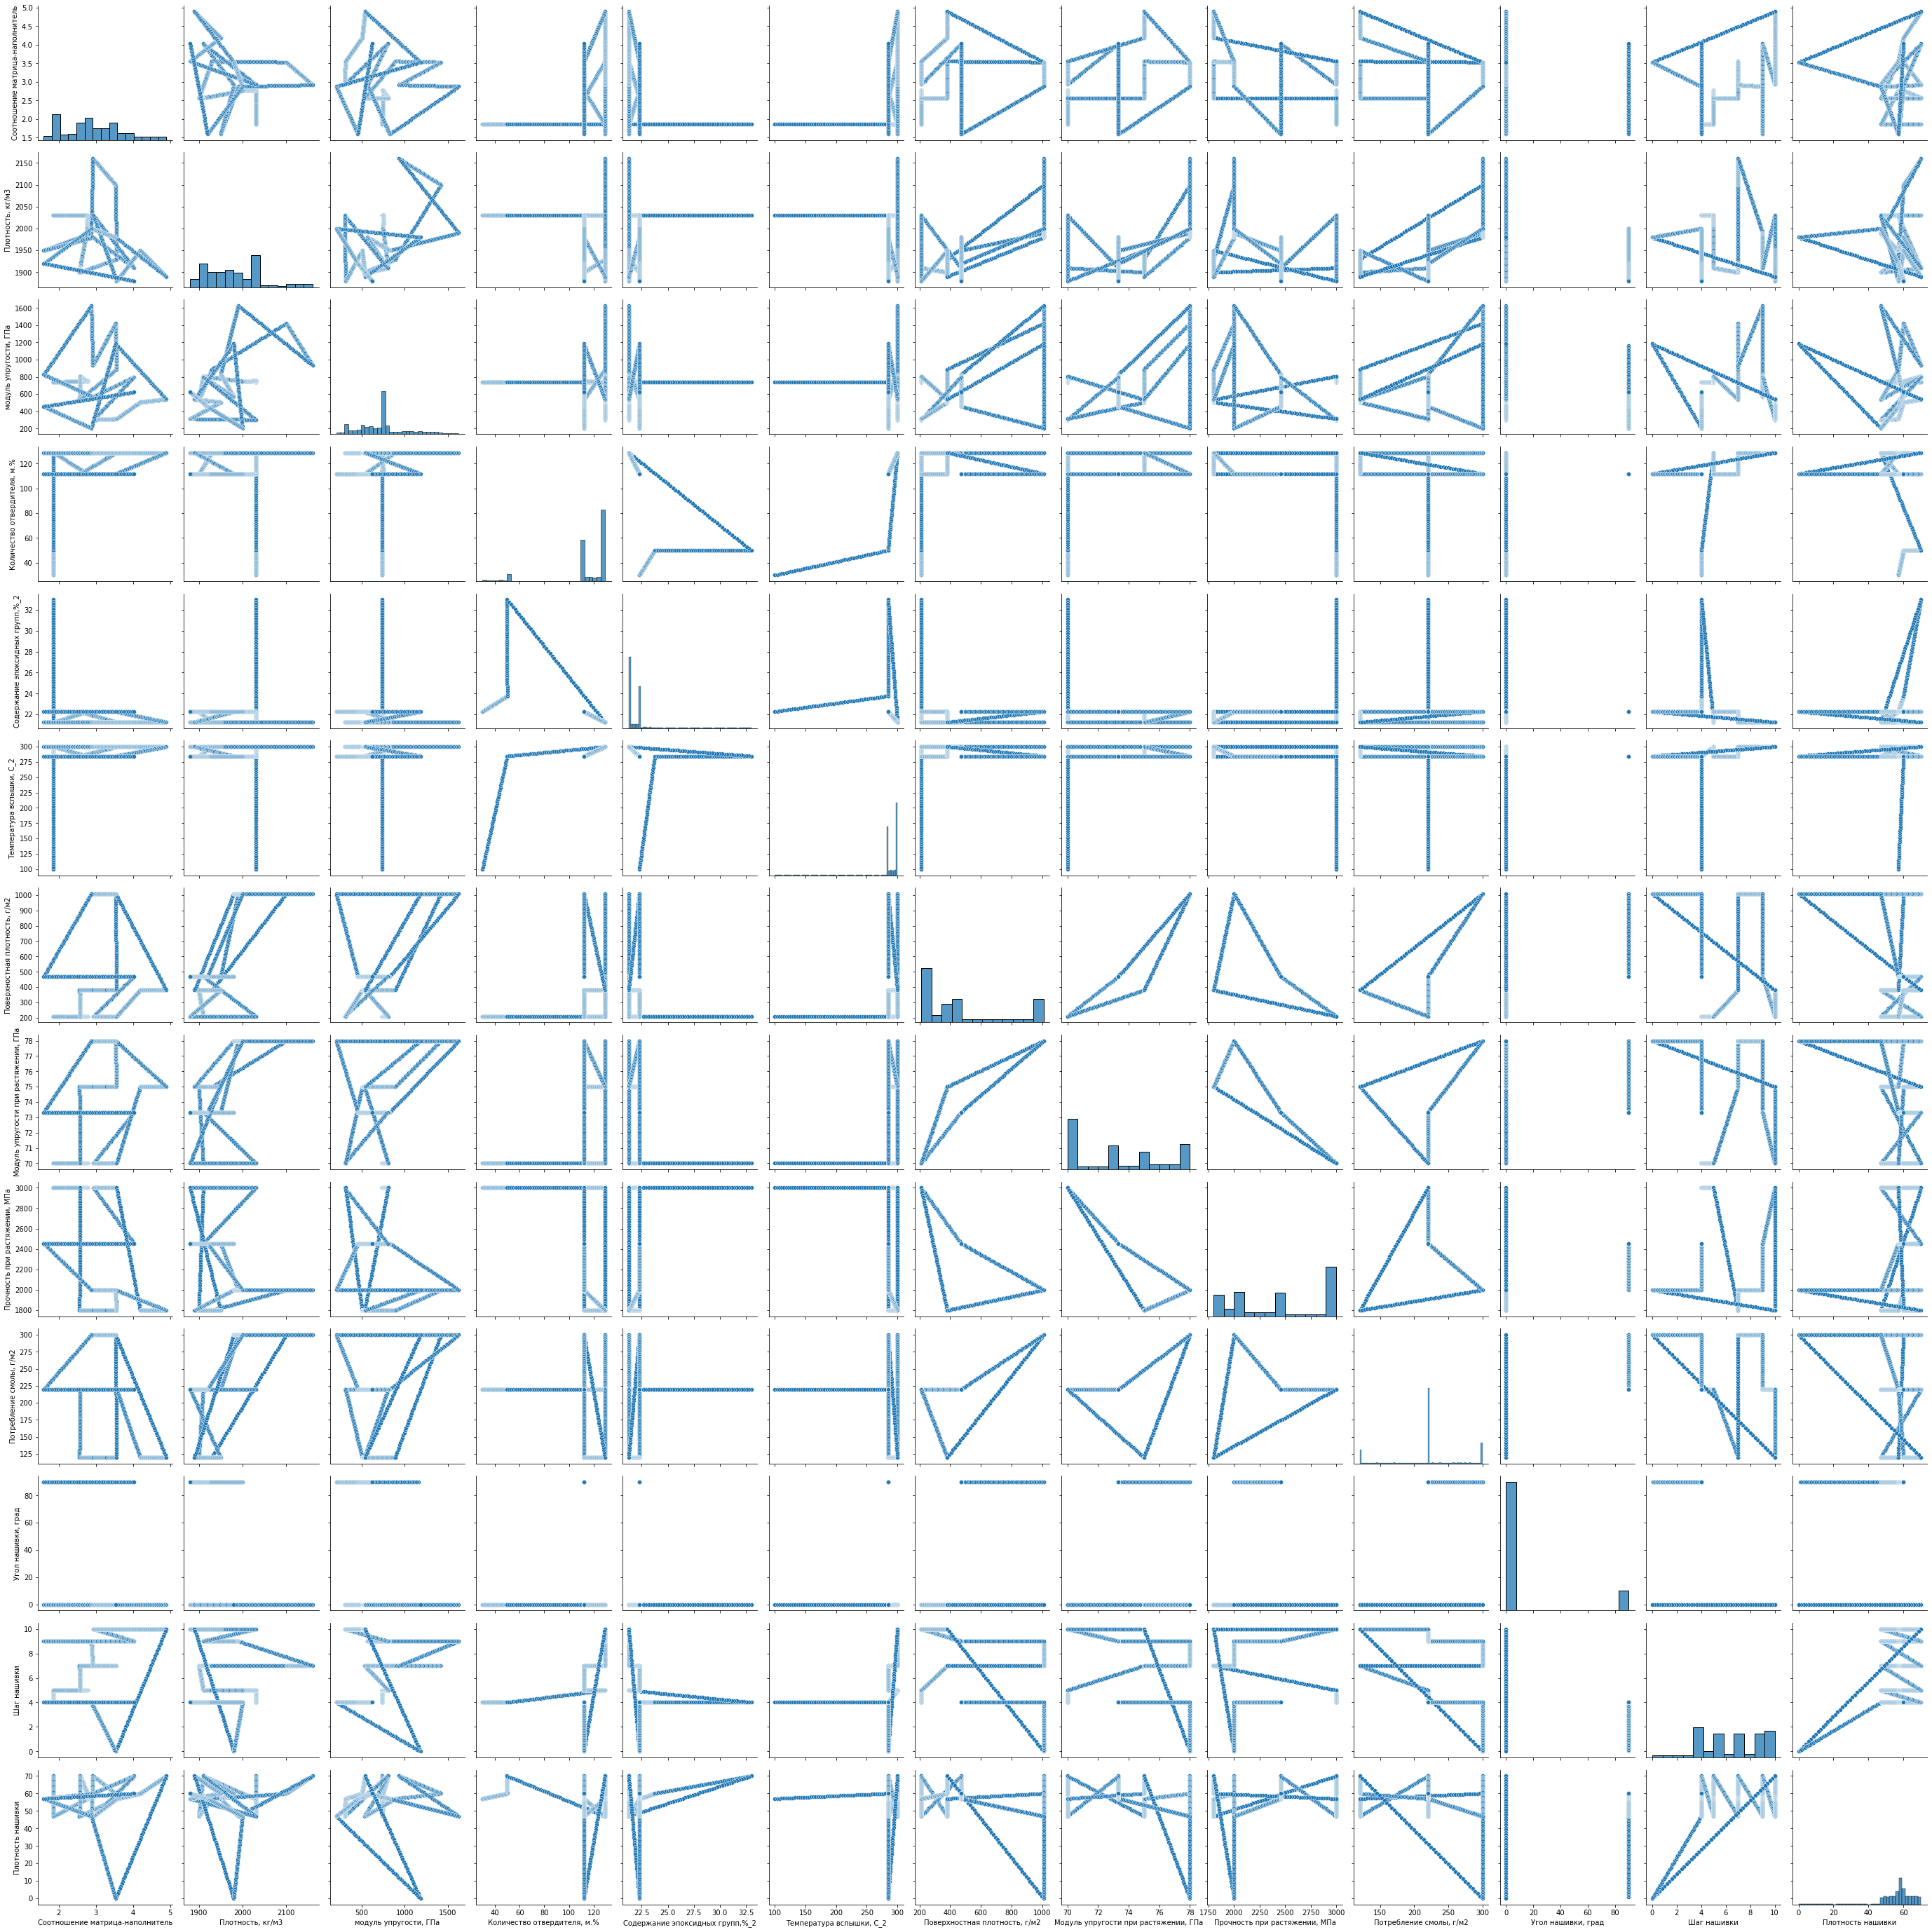

In [20]:
# Вывод парных графиков рассеяния датасета df_s, метод pairplot библиотеки seaborn
sns.pairplot(df_s, height=3)

Вывод: после интерполяции распределение параметров визуально определяется не как нормальное. Следует методами статистики проверить нормальность распределения каждого параметра

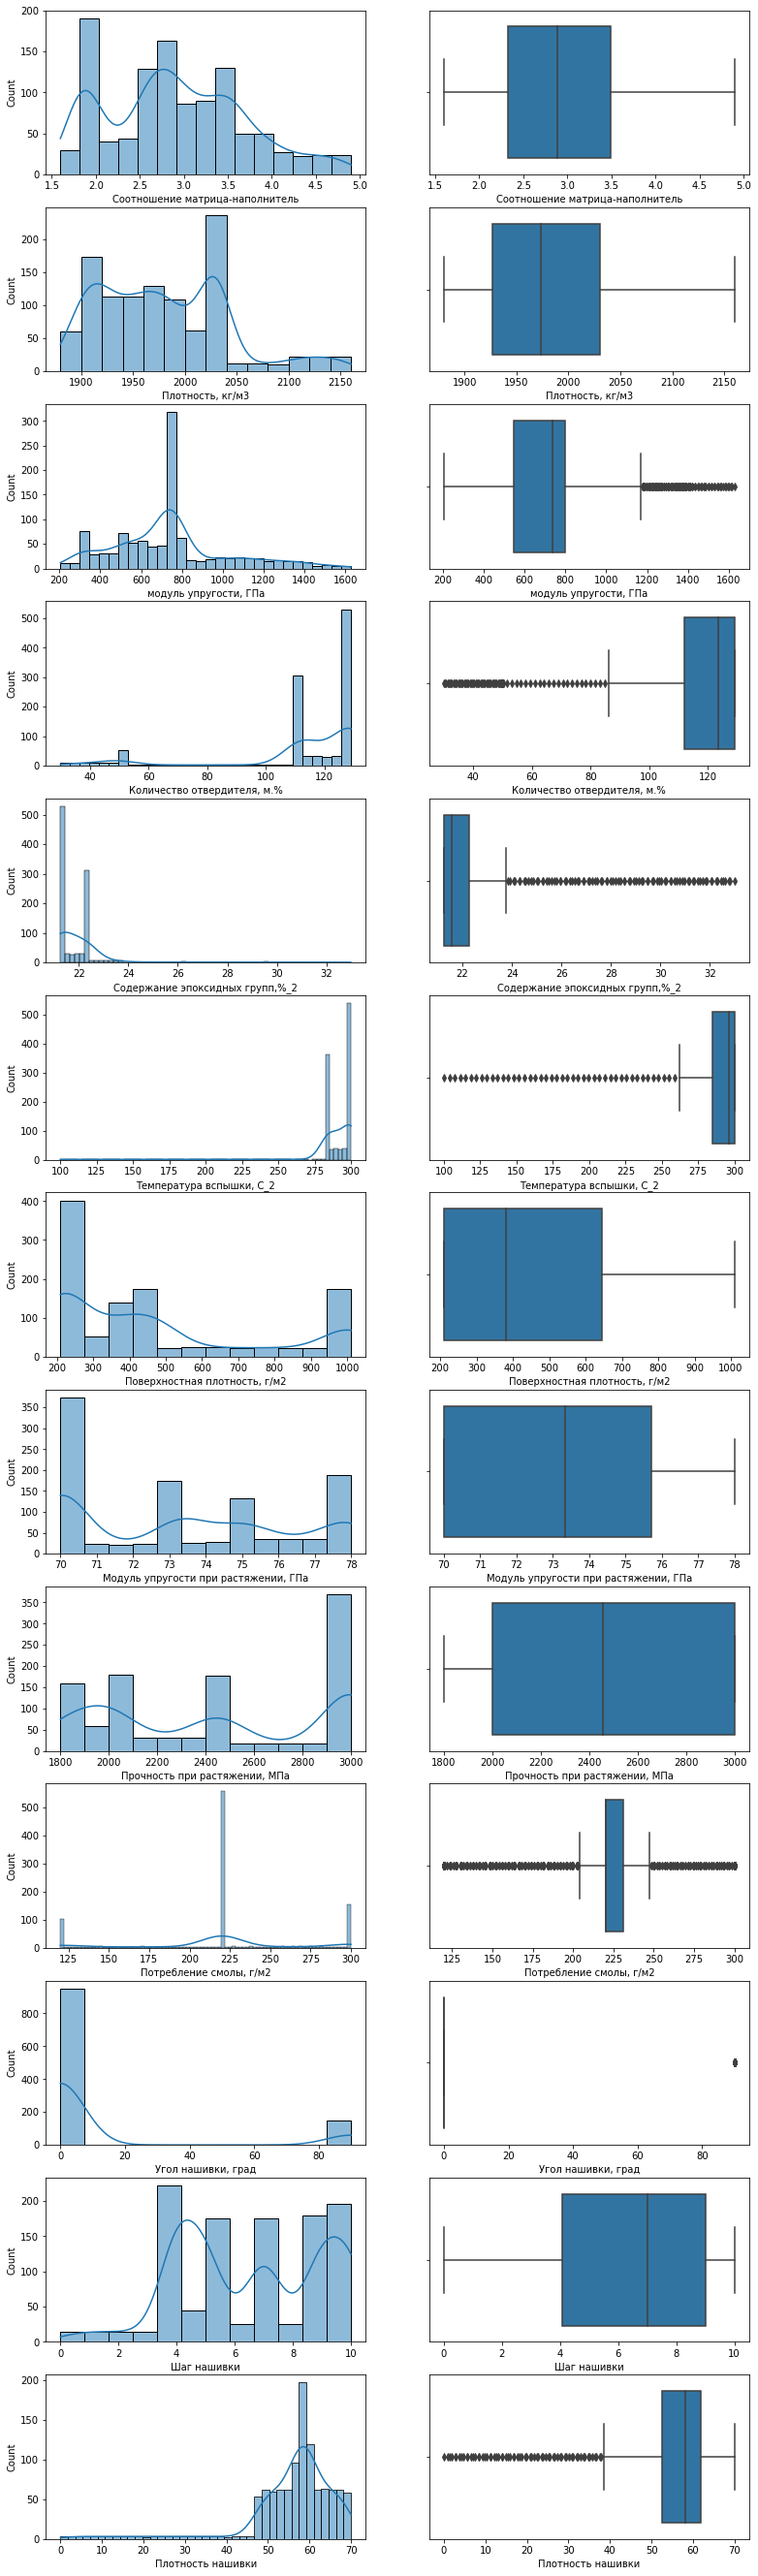

In [21]:
# Построение графиков распределения переменных и "ящики с усами", метод subplots  библиотеки seaborn
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df_s.columns):    
    sns.histplot(data=df_s, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df_s, x=column, ax=axes[k, 1])
plt.show()

Вывод: хотя и имеется некоторое выбросов количество, принято решение не очищать данные от выбросов, поскольку необходимо максимально сохранить данные.

Требуется оценить нормальность распределения параметров по статистическому критерию.

Требуется оценить также корреляцию параметров между собой, а для параметров, имеющих статистически значимую корреляцию, выполнить построение модели статистической регрессии и оценить ее статистическую адекватность.

Требуется произвести сравнение двух групп данных по столбцу 'Угол нашивки' для оценки влияния этого категориального параметра на  количественные параметры датасета

###### Создание датасета с исключенным категориальным параметром

In [22]:
# Вывод сведений о названиях столбцов датасета df, метод columns
df_s.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

Параметр 'Угол нашивки' - категориальный, поэтому требуется его исключение при оценке нормальности распределения и для построения матрицы корреляции по критерию Пирсона

In [23]:
# Создание нового датасета df_d без столбца 'Угол нашивки'
df_d=df_s[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки']]
df_d.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0,4.0,57.00
1,1.857143,2030.0,738.736842,30.4,22.297500,103.692308,210.0,70.0,3000.0,220.0,4.0,57.06
2,1.857143,2030.0,738.736842,30.8,22.327143,107.384615,210.0,70.0,3000.0,220.0,4.0,57.12
3,1.857143,2030.0,738.736842,31.2,22.356786,111.076923,210.0,70.0,3000.0,220.0,4.0,57.18
4,1.857143,2030.0,738.736842,31.6,22.386429,114.769231,210.0,70.0,3000.0,220.0,4.0,57.24


In [24]:
# Вывод сведений о названиях столбцов датасета df_d, метод columns
df_d.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

Вывод: столбец 'Угол нашивки, град' в датасете df_d отсутствует

### 2. Оценка нормальности распределения параметров

In [25]:
# Описательная статистика датасета df_d, метод describe()
df_d.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,2.918634,1979.750227,741.334528,113.681589,22.267857,288.723538,475.785649,73.407508,2443.440307,220.000000,6.543143,55.843324
std,0.783850,62.279796,287.558268,24.568710,2.041260,25.239693,287.199572,2.969528,460.449280,50.335168,2.491736,11.484472
min,1.598174,1880.000000,205.000000,30.000000,21.250000,100.000000,210.000000,70.000000,1800.000000,120.000000,0.000000,0.000000
25%,2.327459,1926.400000,549.160000,111.860000,21.250000,284.615385,210.000000,70.000000,2000.000000,220.000000,4.080000,52.600000
50%,2.884130,1973.400000,738.736842,123.515200,21.575714,296.000000,380.000000,73.333333,2455.555556,220.000000,7.000000,58.080000
75%,3.494317,2030.000000,799.920000,129.000000,22.267857,300.000000,644.600000,75.720000,3000.000000,231.200000,9.000000,62.000000
max,4.897959,2160.000000,1628.000000,129.000000,33.000000,300.000000,1010.000000,78.000000,3000.000000,300.000000,10.000000,70.000000


In [26]:
# Описательная статистика в упорядоченном виде по столбцам датасета df_d
for col in df_d.columns:
    med = statistics.median(df_d[col])
    mean = statistics.mean(df_d[col])
    mod = statistics.mode(df_d[col])
    std = statistics.stdev(df_d[col])
    var = statistics.variance(df_d[col])
    skew = stats.skew(df_d[col])
    kurt = stats.kurtosis(df_d[col])
    max_ = (df_d[col]).max()
    min_ = (df_d[col]).min()
    scope = (df_d[col]).max() - (df_d[col]).min()
    confidence = stats.norm.interval(alpha=0.95, loc=np.mean(df_d[col]), scale=stats.sem(df_d[col]))
    print('\n \t', col, ': \t \n'   'Среднее: ', mean, '\t' 'Медиана: ', med, '\t' 'Мода : ', mod, 
          '\n' 'Стандарт : ', std, '\t' 'Дисперсия: ', var, 
          '\n' 'Асимметрия: ', skew, '\t' 'Эксцесс: ', kurt, 
          '\n' 'Минимум: ', min_, '\t' 'Максимум: ', max_, '\t' 'Размах: ', scope, 
          '\n' 'ДоверитИнтервалСредн: ', confidence) 



 	 Соотношение матрица-наполнитель : 	 
Среднее:  2.9186338960349287 	Медиана:  2.884129585886592 	Мода :  1.85714285714285 
Стандарт :  0.783849873676485 	Дисперсия:  0.6144206244626413 
Асимметрия:  0.33042683406294443 	Эксцесс:  -0.5295665241423051 
Минимум:  1.59817351598173 	Максимум:  4.89795918367346 	Размах:  3.2997856676917294 
ДоверитИнтервалСредн:  (2.872333220849043, 2.9649345712208137)

 	 Плотность, кг/м3 : 	 
Среднее:  1979.7502270663033 	Медиана:  1973.4 	Мода :  2030.0 
Стандарт :  62.27979617269175 	Дисперсия:  3878.77301131203 
Асимметрия:  0.6583718072100164 	Эксцесс:  0.07731013985315816 
Минимум:  1880.0 	Максимум:  2160.0 	Размах:  280.0 
ДоверитИнтервалСредн:  (1976.0714657242747, 1983.4289884083319)

 	 модуль упругости, ГПа : 	 
Среднее:  741.3345284191405 	Медиана:  738.736842105263 	Мода :  738.736842105263 
Стандарт :  287.55826807585805 	Дисперсия:  82689.75753878705 
Асимметрия:  0.7382603506150232 	Эксцесс:  0.4717593881217228 
Минимум:  205.0 	Максимум

Вывод: по всем столбцам средние значения укладываются в доверительные интервалы для средних, мода смещена для некоторых параметров, стандартное отклонение имеет порядок ниже размаха, асимметрия и эксцесс близки к нормальным

Тест д'Агостино (по имени Ralph D’Agostino) вычисляет итоговую статистику на основе распределения( эксцесс и асимметрия), чтобы определить, отклоняется ли рассматриваемое распределение данных от нормального, задан уровень значимости 0,05.

Параметр 'Угол нашивки' изначально не имеет нормального распределения, поэтому по нему не рассчитывается тест д'Агостино.

Оценка нормальности распределения параметров по статистическому критерию д'Агостино:

In [27]:
# Проверка по критерию д'Агостино
accepted_list = []
rejected_list = []

for col in df_d.columns:
    alpha = 0.05
    stat, p = stats.normaltest(df_d[col]) # Критерий согласия д'Агостино
    print(col, ': \t \t \t'  'Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        accepted_list.append(col)
    else:
        rejected_list.append(col)
print()
print(f'Наименование колонок с данными С нормальным распределением: {accepted_list} \n')
print(f'Наименование колонок с данными БЕЗ нормального распределения : {rejected_list}')

Соотношение матрица-наполнитель : 	 	 	Statistics=43.029, p-value=0.000
Плотность, кг/м3 : 	 	 	Statistics=68.038, p-value=0.000
модуль упругости, ГПа : 	 	 	Statistics=89.563, p-value=0.000
Количество отвердителя, м.% : 	 	 	Statistics=442.574, p-value=0.000
Содержание эпоксидных групп,%_2 : 	 	 	Statistics=785.778, p-value=0.000
Температура вспышки, С_2 : 	 	 	Statistics=1115.619, p-value=0.000
Поверхностная плотность, г/м2 : 	 	 	Statistics=160.602, p-value=0.000
Модуль упругости при растяжении, ГПа : 	 	 	Statistics=30109.090, p-value=0.000
Прочность при растяжении, МПа : 	 	 	Statistics=6397.069, p-value=0.000
Потребление смолы, г/м2 : 	 	 	Statistics=17.588, p-value=0.000
Шаг нашивки : 	 	 	Statistics=265.211, p-value=0.000
Плотность нашивки : 	 	 	Statistics=576.723, p-value=0.000

Наименование колонок с данными С нормальным распределением: [] 

Наименование колонок с данными БЕЗ нормального распределения : ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругост

Вывод: по тесту по д'Агостино все параметры датасета имеют распределение статистически отличное от нормального распределения

Критерий Шапиро-Уилка применяется для выборок до 5000 наблюдений, поэтому может быть применен и здесь

In [28]:
# Количество наблюдений, метод shape
df_d.shape[0]

1101

Оценка нормальности распределения параметров по статистическому критерию Шапиро-Уилка:

In [29]:
# Проверка по критерию Щапиро-Уилка
accepted_list = []
rejected_list = []

for col in df_d.columns:
    alpha = 0.05
    stat, p = stats.shapiro(df_d[col]) # Критерий согласия Шапиро-Уилка
    print(col, ': \t \t \t'  'Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        accepted_list.append(col)
    else:
        rejected_list.append(col)
print()
print(f'Наименование колонок с данными С нормальным распределением: {accepted_list} \n')
print(f'Наименование колонок с данными БЕЗ нормального распределения : {rejected_list}')

Соотношение матрица-наполнитель : 	 	 	Statistics=0.961, p-value=0.000
Плотность, кг/м3 : 	 	 	Statistics=0.941, p-value=0.000
модуль упругости, ГПа : 	 	 	Statistics=0.936, p-value=0.000
Количество отвердителя, м.% : 	 	 	Statistics=0.624, p-value=0.000
Содержание эпоксидных групп,%_2 : 	 	 	Statistics=0.504, p-value=0.000
Температура вспышки, С_2 : 	 	 	Statistics=0.394, p-value=0.000
Поверхностная плотность, г/м2 : 	 	 	Statistics=0.808, p-value=0.000
Модуль упругости при растяжении, ГПа : 	 	 	Statistics=0.864, p-value=0.000
Прочность при растяжении, МПа : 	 	 	Statistics=0.845, p-value=0.000
Потребление смолы, г/м2 : 	 	 	Statistics=0.852, p-value=0.000
Шаг нашивки : 	 	 	Statistics=0.916, p-value=0.000
Плотность нашивки : 	 	 	Statistics=0.761, p-value=0.000

Наименование колонок с данными С нормальным распределением: [] 

Наименование колонок с данными БЕЗ нормального распределения : ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отв

Вывод: по тесту Шапиро-Уилка все параметры датасета имеют распределение статистически отличное от нормального распределения

### 3. Оценка корреляции параметров

Корреляция для количественных параметров и количественно-категориальных оценивается по критериям Пирсона и Спирмена соответственно

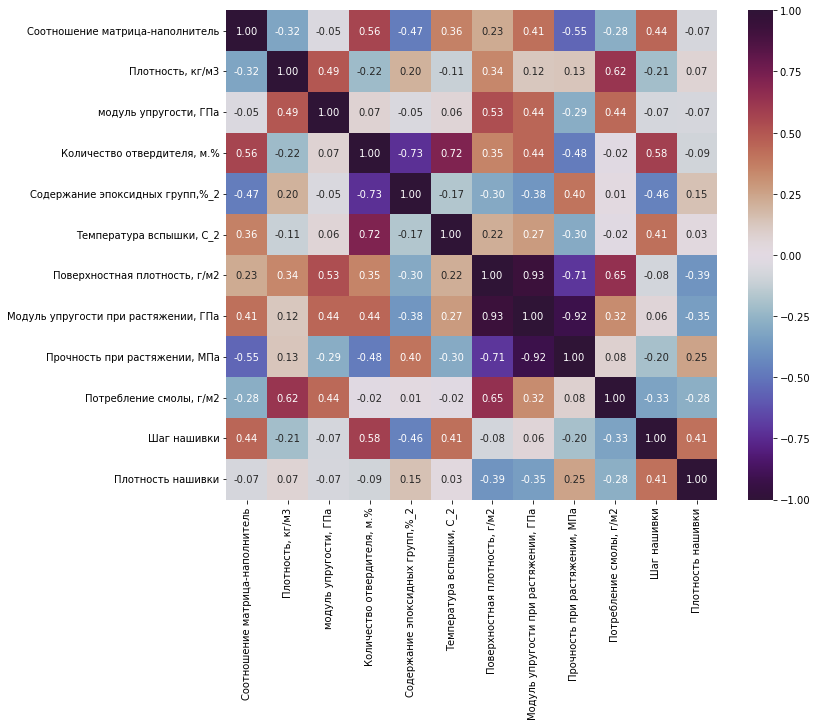

In [30]:
# Матрица корреляции по Пирсону для количественных параметров
corr = df_d.corr() # Пирсон установлен по умолчанию
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

Вывод: судя по матрице корреляции, построенной на основании корреляции по Пирсону для количественных данных, коэффициенты корреляции R указывают на корреляцию между рядом параметров:

параметр 'Модуль упругости при растяжении, ГПа' имеет корреляцию с 'Поверхностная плотность, г/м2' с R=0,93 и с 'Прочность при растяжении, МПа' с R=-0,92; этот же параметр имеет корреляцию с 'Соотношение матрица-наполнитель', 'модуль упругости, ГПа' и 'Количество отвердителя, м.%' с R около 0,4;

параметр 'Прочность при растяжении, МПа' имеет корреляцию с 'Поверхностная плотность, г/м2' с R=-0,71; с 'Модуль упругости при растяжении, ГПа' с R=-0,92; с 'Соотношение матрица-наполнитель' с R=-0,58; с 'Количество отвердителя, м.%' с R=-0,48;

Наличествуют также и другие довольно заметные коэффициенты корреляции R.

Значения коэффициента R в настоящей матрице корреляции в целом достаточно близки к значениям таковых в матрице построенной на датасете из 23 значений до интерполяции данных.

Следует сформулировать и проверить статистическую гипотезу для проверки значимости попарной связи между количественными параметрами.

In [31]:
# Вывод сведений о названиях столбцов датасета df_d, метод columns
df_d.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

Проверка корреляции по критерию Пирсона:

формулировка гипотезы:

H0: R = 0,

H1: R не равен 0 с заданным уровнем значимости равным 0,05

In [32]:
# Проверка по критерию Пирсона
count = 0 
for col in df_d.columns:
    print()
    count += 1
    print(count)
    print(col)
    for col1 in df_d.columns[count:]:
        alpha = 0.05
        stat, p = stats.pearsonr(df_d[col], df_d[col1]) # Критерий Пирсона
        if p > alpha:
            print()
            # print(f'Наименование колонок и строк БЕЗ корреляции: ')
            # print(col, ' & ', col1)
        else:
            print()
            print(f'Наименование колонок и строк С корреляцией: ')
            print(col, ' & ', col1, ': \t\t \n'  'Statistics=%.3f, p-value=%.3f' % (stat, p))



1
Соотношение матрица-наполнитель

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Плотность, кг/м3 : 		 
Statistics=-0.320, p-value=0.000


Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Количество отвердителя, м.% : 		 
Statistics=0.561, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Содержание эпоксидных групп,%_2 : 		 
Statistics=-0.473, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Температура вспышки, С_2 : 		 
Statistics=0.357, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Поверхностная плотность, г/м2 : 		 
Statistics=0.226, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Модуль упругости при растяжении, ГПа : 		 
Statistics=0.414, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполни

Вывод: статистически значимыми по критерию Пирсона оказываются практически все попарные корреляции между всеми количественными параметрами, но, поскольку распределение параметров статистически отличается от нормального, следует использовать критерий Спирмена

Учитывая, что изначально присутствует категориальный параметр 'Угол нашивки', следует проверить статистическую значимость попарных корреляций этого параметра с остальными параметрами по критерию Спирмена:

In [33]:
# ранговая корреляция Спирмена с учетом того, что присутствует категориальный параметр 'Угол нашивки'
df_s.corr(method='spearman')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,-0.355803,-0.063614,0.578070,-0.586007,0.502599,0.343290,0.441346,-0.556913,-0.209291,-0.069057,0.490175,0.081806
"Плотность, кг/м3",-0.355803,1.000000,0.454370,-0.114663,0.124095,-0.015108,0.006566,-0.029980,0.275140,0.591102,-0.187440,-0.282323,0.042125
"модуль упругости, ГПа",-0.063614,0.454370,1.000000,0.088841,-0.088093,0.101274,0.296254,0.284537,-0.140997,0.392147,-0.337464,-0.146412,0.105246
"Количество отвердителя, м.%",0.578070,-0.114663,0.088841,1.000000,-0.991425,0.960797,0.416745,0.416629,-0.428767,0.005526,-0.344770,0.859818,0.042252
"Содержание эпоксидных групп,%_2",-0.586007,0.124095,-0.088093,-0.991425,1.000000,-0.935876,-0.424607,-0.424466,0.436441,-0.006351,0.337502,-0.855892,-0.036384
"Температура вспышки, С_2",0.502599,-0.015108,0.101274,0.960797,-0.935876,1.000000,0.336806,0.339041,-0.356350,-0.007444,-0.433493,0.856173,0.105608
"Поверхностная плотность, г/м2",0.343290,0.006566,0.296254,0.416745,-0.424607,0.336806,1.000000,0.950752,-0.758429,0.524716,0.390539,0.030826,-0.171277
"Модуль упругости при растяжении, ГПа",0.441346,-0.029980,0.284537,0.416629,-0.424466,0.339041,0.950752,1.000000,-0.894822,0.365552,0.299013,0.081709,-0.196212
"Прочность при растяжении, МПа",-0.556913,0.275140,-0.140997,-0.428767,0.436441,-0.356350,-0.758429,-0.894822,1.000000,0.055332,-0.144867,-0.221059,0.149186
"Потребление смолы, г/м2",-0.209291,0.591102,0.392147,0.005526,-0.006351,-0.007444,0.524716,0.365552,0.055332,1.000000,0.346472,-0.336344,-0.165923


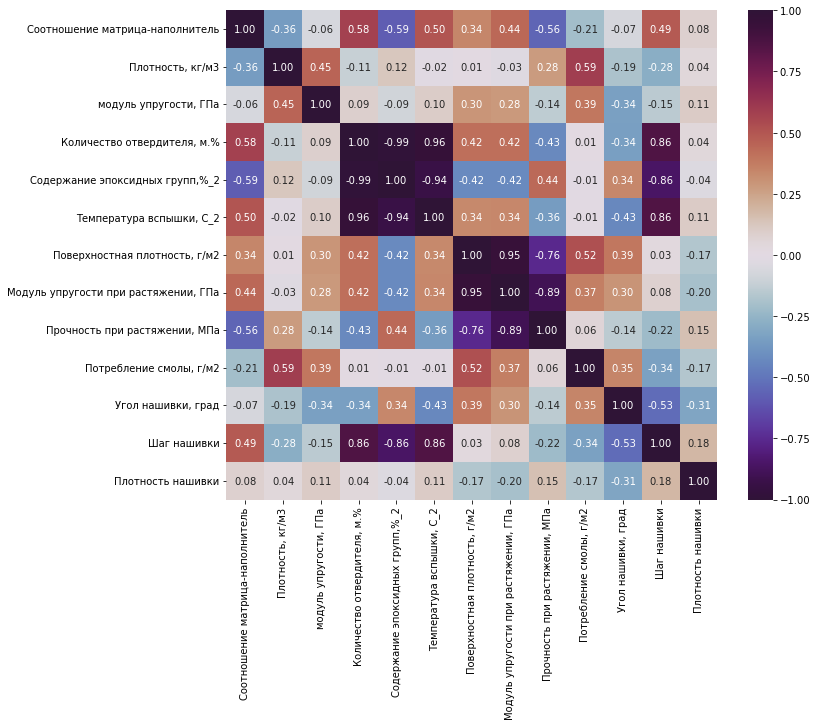

In [34]:
# Мартица корреляции по ранговому критерию корреляции Спирмена для категориальных и количественно-категориальных параметров
fig, ax = plt.subplots(figsize=(11, 9)) # аргумент 'spearman' указывает на критерий Спирмена
hm = sns.heatmap(df_s.corr(method = 'spearman'),  vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)

Вывод: судя по матрице корреляции, построенной на основании корреляции по Спирмену для количественных и качественных данных, коэффициенты  R указывают на корреляцию между рядом параметров:


параметр 'Угол нашивки, град' имеет корреляцию с 'Шаг нашивки' с R=0,4 и с 'модуль упругости, ГПа' с R=-0,43; этот же параметр имеет корреляцию с 'Содержание эпоксидных групп,%_2', 'Поверхностная плотность, г/м2' и 'Температура вспышки, С_2' с R в пределах 0,3 - 0,4.

Наличествуют также и другие довольно заметные коэффициенты корреляции R.

Значения коэффициента R в настоящей матрице корреляции в целом достаточно близки к значениям таковых в матрице построенной на датасете из 23 значений до интерполяции данных.

Следует сформулировать и проверить статистическую гипотезу для проверки значимости попарной связи между категориальным параметром 'Угол нашивки, град' и остальными параметрами.

In [35]:
# Вывод сведений о названиях столбцов датасета df_s, метод columns
df_s.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

Проверка корреляции по критерию Спирмена:

формулировка гипотезы: 

H0: R = 0, 

H1: R не равен 0 с заданным уровнем значимости равным 0,05

In [36]:
# Проверка по критерию Спирмена
accepted_list = []
rejected_list = []

for col in df_s.columns:
    alpha = 0.05
    stat, p = stats.spearmanr(df_s['Угол нашивки, град'] , df_s[col]) # ранговая корреляция Спирмена
    print(col, ': \t \t \t'  'Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        accepted_list.append(col)
    else:
        rejected_list.append(col)
print()
print(f'Наименование колонок, для которых принимается H0 и отвергается альтернативная H1 : {accepted_list} \n')
print(f'Наименование колонок, для которых принимается альтернативная H1 и отвергается H0 : {rejected_list}')

Соотношение матрица-наполнитель : 	 	 	Statistics=-0.069, p-value=0.022
Плотность, кг/м3 : 	 	 	Statistics=-0.187, p-value=0.000
модуль упругости, ГПа : 	 	 	Statistics=-0.337, p-value=0.000
Количество отвердителя, м.% : 	 	 	Statistics=-0.345, p-value=0.000
Содержание эпоксидных групп,%_2 : 	 	 	Statistics=0.338, p-value=0.000
Температура вспышки, С_2 : 	 	 	Statistics=-0.433, p-value=0.000
Поверхностная плотность, г/м2 : 	 	 	Statistics=0.391, p-value=0.000
Модуль упругости при растяжении, ГПа : 	 	 	Statistics=0.299, p-value=0.000
Прочность при растяжении, МПа : 	 	 	Statistics=-0.145, p-value=0.000
Потребление смолы, г/м2 : 	 	 	Statistics=0.346, p-value=0.000
Угол нашивки, град : 	 	 	Statistics=1.000, p-value=0.000
Шаг нашивки : 	 	 	Statistics=-0.535, p-value=0.000
Плотность нашивки : 	 	 	Statistics=-0.314, p-value=0.000

Наименование колонок, для которых принимается H0 и отвергается альтернативная H1 : [] 

Наименование колонок, для которых принимается альтернативная H1 и отве

Вывод: статистически значимыми по критерию Спирмена оказываются все попарные корреляции между категориальным параметром 'Угол нашивки, град' и остальными количественными параметрами

Ранее было показано, что по тесту Шапиро-Уилка все параметры имеют вид распределения статистически отличный от нормального, поэтому

In [37]:
# Проверка по критерию Спирмена
count = 0 
for col in df_s.columns:
    print()
    count += 1
    print(count)
    print(col)
    for col1 in df_s.columns[count:]:
        alpha = 0.05
        stat, p = stats.spearmanr(df_s[col], df_s[col1]) # Критерий Спирмена
        if p > alpha:
            print()
        else:
            print()
            print(f'Наименование колонок и строк С корреляцией: ')
            print(col, ' & ', col1, ': \t\t \n'  'Statistics=%.3f, p-value=%.3f' % (stat, p))



1
Соотношение матрица-наполнитель

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Плотность, кг/м3 : 		 
Statistics=-0.356, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  модуль упругости, ГПа : 		 
Statistics=-0.064, p-value=0.035

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Количество отвердителя, м.% : 		 
Statistics=0.578, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Содержание эпоксидных групп,%_2 : 		 
Statistics=-0.586, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Температура вспышки, С_2 : 		 
Statistics=0.503, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Поверхностная плотность, г/м2 : 		 
Statistics=0.343, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Модуль

Вывод: кроме того для параметров

    Соотношение матрица-наполнитель  &  Плотность, кг/м3 : Statistics=-0.356, p-value=0.000
    Соотношение матрица-наполнитель  &  модуль упругости, ГПа : Statistics=-0.064, p-value=0.035
    Соотношение матрица-наполнитель  &  Количество отвердителя, м.% : Statistics=0.578, p-value=0.000
    Соотношение матрица-наполнитель  &  Содержание эпоксидных групп,%_2 : Statistics=-0.586, p-value=0.000
    Соотношение матрица-наполнитель  &  Температура вспышки, С_2 : Statistics=0.503, p-value=0.000
    Соотношение матрица-наполнитель  &  Поверхностная плотность, г/м2 : Statistics=0.343, p-value=0.000
    Соотношение матрица-наполнитель  &  Модуль упругости при растяжении, ГПа : Statistics=0.441, p-value=0.000
    Соотношение матрица-наполнитель  &  Прочность при растяжении, МПа : Statistics=-0.557, p-value=0.000
    Соотношение матрица-наполнитель  &  Потребление смолы, г/м2 : Statistics=-0.209, p-value=0.000
    Соотношение матрица-наполнитель  &  Угол нашивки, град : Statistics=-0.069, p-value=0.022
    Соотношение матрица-наполнитель  &  Шаг нашивки : Statistics=0.490, p-value=0.000
    Соотношение матрица-наполнитель  &  Плотность нашивки : Statistics=0.082, p-value=0.007
    Плотность, кг/м3  &  модуль упругости, ГПа : Statistics=0.454, p-value=0.000
    Плотность, кг/м3  &  Количество отвердителя, м.% : Statistics=-0.115, p-value=0.000
    Плотность, кг/м3  &  Содержание эпоксидных групп,%_2 : Statistics=0.124, p-value=0.000
    Плотность, кг/м3  &  Прочность при растяжении, МПа : Statistics=0.275, p-value=0.000
    Плотность, кг/м3  &  Потребление смолы, г/м2 : Statistics=0.591, p-value=0.000
    Плотность, кг/м3  &  Угол нашивки, град : Statistics=-0.187, p-value=0.000
    Плотность, кг/м3  &  Шаг нашивки : Statistics=-0.282, p-value=0.000
    модуль упругости, ГПа  &  Количество отвердителя, м.% : Statistics=0.089, p-value=0.003
    модуль упругости, ГПа  &  Содержание эпоксидных групп,%_2 : Statistics=-0.088, p-value=0.003
    модуль упругости, ГПа  &  Температура вспышки, С_2 : Statistics=0.101, p-value=0.001
    модуль упругости, ГПа  &  Поверхностная плотность, г/м2 : Statistics=0.296, p-value=0.000
    модуль упругости, ГПа  &  Модуль упругости при растяжении, ГПа : Statistics=0.285, p-value=0.000
    модуль упругости, ГПа  &  Прочность при растяжении, МПа : Statistics=-0.141, p-value=0.000
    модуль упругости, ГПа  &  Потребление смолы, г/м2 : Statistics=0.392, p-value=0.000
    модуль упругости, ГПа  &  Угол нашивки, град : Statistics=-0.337, p-value=0.000
    модуль упругости, ГПа  &  Шаг нашивки : Statistics=-0.146, p-value=0.000
    модуль упругости, ГПа  &  Плотность нашивки : Statistics=0.105, p-value=0.000
    Количество отвердителя, м.%  &  Содержание эпоксидных групп,%_2 : Statistics=-0.991, p-value=0.000
    Количество отвердителя, м.%  &  Температура вспышки, С_2 : Statistics=0.961, p-value=0.000
    Количество отвердителя, м.%  &  Поверхностная плотность, г/м2 : Statistics=0.417, p-value=0.000
    Количество отвердителя, м.%  &  Модуль упругости при растяжении, ГПа : Statistics=0.417, p-value=0.000
    Количество отвердителя, м.%  &  Прочность при растяжении, МПа : Statistics=-0.429, p-value=0.000
    Количество отвердителя, м.%  &  Угол нашивки, град : Statistics=-0.345, p-value=0.000
    Количество отвердителя, м.%  &  Шаг нашивки : Statistics=0.860, p-value=0.000
    Содержание эпоксидных групп,%_2  &  Температура вспышки, С_2 : Statistics=-0.936, p-value=0.000
    Содержание эпоксидных групп,%_2  &  Поверхностная плотность, г/м2 : Statistics=-0.425, p-value=0.000
    Содержание эпоксидных групп,%_2  &  Модуль упругости при растяжении, ГПа : Statistics=-0.424, p-value=0.000
    Содержание эпоксидных групп,%_2  &  Прочность при растяжении, МПа : Statistics=0.436, p-value=0.000
    Содержание эпоксидных групп,%_2  &  Угол нашивки, град : Statistics=0.338, p-value=0.000
    Содержание эпоксидных групп,%_2  &  Шаг нашивки : Statistics=-0.856, p-value=0.000
    Температура вспышки, С_2  &  Поверхностная плотность, г/м2 : Statistics=0.337, p-value=0.000
    Температура вспышки, С_2  &  Модуль упругости при растяжении, ГПа : Statistics=0.339, p-value=0.000
    Температура вспышки, С_2  &  Прочность при растяжении, МПа : Statistics=-0.356, p-value=0.000
    Температура вспышки, С_2  &  Угол нашивки, град : Statistics=-0.433, p-value=0.000
    Температура вспышки, С_2  &  Шаг нашивки : Statistics=0.856, p-value=0.000
    Температура вспышки, С_2  &  Плотность нашивки : Statistics=0.106, p-value=0.000
    Поверхностная плотность, г/м2  &  Модуль упругости при растяжении, ГПа : Statistics=0.951, p-value=0.000
    Поверхностная плотность, г/м2  &  Прочность при растяжении, МПа : Statistics=-0.758, p-value=0.000
    Поверхностная плотность, г/м2  &  Потребление смолы, г/м2 : Statistics=0.525, p-value=0.000
    Поверхностная плотность, г/м2  &  Угол нашивки, град : Statistics=0.391, p-value=0.000
    Поверхностная плотность, г/м2  &  Плотность нашивки : Statistics=-0.171, p-value=0.000
    Модуль упругости при растяжении, ГПа  &  Прочность при растяжении, МПа : Statistics=-0.895, p-value=0.000
    Модуль упругости при растяжении, ГПа  &  Потребление смолы, г/м2 : Statistics=0.366, p-value=0.000
    Модуль упругости при растяжении, ГПа  &  Угол нашивки, град : Statistics=0.299, p-value=0.000
    Модуль упругости при растяжении, ГПа  &  Шаг нашивки : Statistics=0.082, p-value=0.007
    Модуль упругости при растяжении, ГПа  &  Плотность нашивки : Statistics=-0.196, p-value=0.000
    Прочность при растяжении, МПа  &  Угол нашивки, град : Statistics=-0.145, p-value=0.000
    Прочность при растяжении, МПа  &  Шаг нашивки : Statistics=-0.221, p-value=0.000
    Прочность при растяжении, МПа  &  Плотность нашивки : Statistics=0.149, p-value=0.000
    Потребление смолы, г/м2  &  Угол нашивки, град : Statistics=0.346, p-value=0.000
    Потребление смолы, г/м2  &  Шаг нашивки : Statistics=-0.336, p-value=0.000
    Потребление смолы, г/м2  &  Плотность нашивки : Statistics=-0.166, p-value=0.000
    Угол нашивки, град  &  Шаг нашивки : Statistics=-0.535, p-value=0.000
    Угол нашивки, град  &  Плотность нашивки : Statistics=-0.314, p-value=0.000
    Шаг нашивки  &  Плотность нашивки : Statistics=0.184, p-value=0.000

### 4. Статистическое сравнение 2-х групп (углы нашивки 0 и 90 град)

In [38]:
# Вывод сведений о названиях столбцов датасета df_s, метод columns
df_s.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

Статистическое сравнение 2х групп (углы нашивки 0 и 90 град) возможно осуществить по критерию Колмогорова-Смирнова (для категориальных переменных).

Формулировка гипотезы по критерию Колмогорова-Смирнова (для категориальных переменных):

H0: Статистически значимые отличия в группах отсутствуют (уровень значимости равен 0,05).

H1: Присутствуют статистически значимые отличия в группах с тем же уровнем значимости.

In [39]:
# проверка по критерию Коломгорова-Смирнова
accepted_list = []
rejected_list = []

for col in df_s.columns:
    alpha = 0.05
    df1=np.array(df_s[df_s['Угол нашивки, град'] == 0][col].dropna())
    df2=np.array(df_s[df_s['Угол нашивки, град'] == 90][col].dropna())
    stat, p = stats.kstest(df1, df2) # критерий Колмогорова-Смирнова 
    print(col, ': \t \t \t'  'Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        accepted_list.append(col)
    else:
        rejected_list.append(col)
print()
print(f'Наименование колонок, для которых принимается H0 и отвергается альтернативная H1 : {accepted_list} \n')
print(f'Наименование колонок, для которых принимается альтернативная H1 и отвергается H0 : {rejected_list}')

Соотношение матрица-наполнитель : 	 	 	Statistics=0.193, p-value=0.000
Плотность, кг/м3 : 	 	 	Statistics=0.420, p-value=0.000
модуль упругости, ГПа : 	 	 	Statistics=0.562, p-value=0.000
Количество отвердителя, м.% : 	 	 	Statistics=0.693, p-value=0.000
Содержание эпоксидных групп,%_2 : 	 	 	Statistics=0.687, p-value=0.000
Температура вспышки, С_2 : 	 	 	Statistics=0.734, p-value=0.000
Поверхностная плотность, г/м2 : 	 	 	Statistics=0.647, p-value=0.000
Модуль упругости при растяжении, ГПа : 	 	 	Statistics=0.491, p-value=0.000
Прочность при растяжении, МПа : 	 	 	Statistics=0.468, p-value=0.000
Потребление смолы, г/м2 : 	 	 	Statistics=0.457, p-value=0.000
Угол нашивки, град : 	 	 	Statistics=1.000, p-value=0.000
Шаг нашивки : 	 	 	Statistics=0.872, p-value=0.000
Плотность нашивки : 	 	 	Statistics=0.359, p-value=0.000

Наименование колонок, для которых принимается H0 и отвергается альтернативная H1 : [] 

Наименование колонок, для которых принимается альтернативная H1 и отвергается 

Вывод: статистическими значимыми по критерию Колмогорова-Смирнова (для категориальных переменных) оказываются значимыми различия средних для всех параметров датасета по двум группам угла нашивки (углы нашивки 0 и 90 град)

- Однофакторный анализ для оценки различия средних по двум группам угла нашивки (углы нашивки 0 и 90 град)

Однофакторный дисперсионный анализ использует следующие нулевую и альтернативную гипотезы :

    H 0 (нулевая гипотеза): µ 1 = µ 2 = µ 3 = … = µ k (все средние значения совокупности равны)
    H 1 (нулевая гипотеза): по крайней мере одно среднее значение популяции отличаетсяот остальных


Чтобы результаты однофакторного дисперсионного анализа были достоверными, должны выполняться следующие допущения:
1. Нормальность. Каждая выборка была взята из нормально распределенной популяции.
2. Равные дисперсии — дисперсии совокупностей, из которых взяты выборки, равны. Вы можете использовать тест Бартлетта, чтобы проверить это предположение.
3. Независимость.Наблюдения в каждой группе независимы друг от друга, а наблюдения внутри групп были получены путем случайной выборки.    


Тест Бартлетта использует следующие нулевые и альтернативные гипотезы :

H 0 : Дисперсия среди каждой группы равна.

H 1 : По крайней мере, одна группа имеет дисперсию, не равную остальным.

Поскольку распределение параметров не подчиняется нормальному, данный тест здесь применять нецелесообразно

###### Очистка данных от выбросов: 

In [40]:
# Вывод сведений о датасете df_s, метод info()
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1100
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1101 non-null   float64
 1   Плотность, кг/м3                      1101 non-null   float64
 2   модуль упругости, ГПа                 1101 non-null   float64
 3   Количество отвердителя, м.%           1101 non-null   float64
 4   Содержание эпоксидных групп,%_2       1101 non-null   float64
 5   Температура вспышки, С_2              1101 non-null   float64
 6   Поверхностная плотность, г/м2         1101 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1101 non-null   float64
 8   Прочность при растяжении, МПа         1101 non-null   float64
 9   Потребление смолы, г/м2               1101 non-null   float64
 10  Угол нашивки, град                    1101 non-null   int32  
 11  Шаг нашивки      

Вывод: датасет качественный и очистка данных от выбросов не осуществляется с целью максимального сохранения исходных данных

### 5. Построение моделей статистической регрессии

In [41]:
# Загрузка библиотек sklearn для проведения регрессионного анализа
import sklearn.linear_model as lm
import statsmodels.formula.api as smf

###### Анализ общей модели множественной регрессии

In [41]:
# Вывод названий столбцов датасета df_s
df_s.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [42]:
# Вывод первых пяти строк датасета df_s
df_s.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.00
1,1.857143,2030.0,738.736842,30.4,22.297500,103.692308,210.0,70.0,3000.0,220.0,0,4.0,57.06
2,1.857143,2030.0,738.736842,30.8,22.327143,107.384615,210.0,70.0,3000.0,220.0,0,4.0,57.12
3,1.857143,2030.0,738.736842,31.2,22.356786,111.076923,210.0,70.0,3000.0,220.0,0,4.0,57.18
4,1.857143,2030.0,738.736842,31.6,22.386429,114.769231,210.0,70.0,3000.0,220.0,0,4.0,57.24


In [43]:
# Тип данных столбца 'Угол нашивки, град' датасета df_s, метод dtypes()
df_s['Угол нашивки, град'] = df_s['Угол нашивки, град'].astype(int)
df_s.dtypes['Угол нашивки, град']

dtype('int32')

Ни один из параметров датасета нельзя рассматривать как имеющий нормальное распределение по причине неслучайного выбора величин параметров (физических характеристик) при проведении испытаний и по причине использования интерполяции для заполнения недостающих значений, тем не менее, ниже были рассмотрены модели множественной регрессии для параметров 'Модуль упругости при растяжении, ГПа' и 'Прочность при растяжении, МПа':

In [44]:
# Создание нового датасета ff для модели множественной регрессии
ff = df_s
# Замена названия столбцов таблицы методом set_axis() для создания OLS-модели
ff = ff.set_axis(['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13'], axis = 'columns')
ff.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13
0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.00
1,1.857143,2030.0,738.736842,30.4,22.297500,103.692308,210.0,70.0,3000.0,220.0,0,4.0,57.06
2,1.857143,2030.0,738.736842,30.8,22.327143,107.384615,210.0,70.0,3000.0,220.0,0,4.0,57.12
3,1.857143,2030.0,738.736842,31.2,22.356786,111.076923,210.0,70.0,3000.0,220.0,0,4.0,57.18
4,1.857143,2030.0,738.736842,31.6,22.386429,114.769231,210.0,70.0,3000.0,220.0,0,4.0,57.24


Необходимо также учесть влияние категориальных переменных.

In [45]:
# Замена категориальных переменых порядковыми переменными, метод concat, 
# Dummy variables, аргумент get_dummies
ff = pd.concat((ff,pd.get_dummies(ff.col11, prefix="col11", prefix_sep='',)),1)
ff.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12160\4291356752.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  ff = pd.concat((ff,pd.get_dummies(ff.col11, prefix="col11", prefix_sep='',)),1)


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col110,col1190
0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.00,1,0
1,1.857143,2030.0,738.736842,30.4,22.297500,103.692308,210.0,70.0,3000.0,220.0,0,4.0,57.06,1,0
2,1.857143,2030.0,738.736842,30.8,22.327143,107.384615,210.0,70.0,3000.0,220.0,0,4.0,57.12,1,0
3,1.857143,2030.0,738.736842,31.2,22.356786,111.076923,210.0,70.0,3000.0,220.0,0,4.0,57.18,1,0
4,1.857143,2030.0,738.736842,31.6,22.386429,114.769231,210.0,70.0,3000.0,220.0,0,4.0,57.24,1,0


In [46]:
# Модель OLS множественной регрессии для параметра 'col8' - 'Модуль упругости при растяжении, ГПа'
resultsm = smf.ols('col8 ~ col1 + col2 + col3 + col4 + col5 + col6 + col7 + col9 + col10 + col12 + col13 + col110', data=ff).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   col8   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.554e+29
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:32:46   Log-Likelihood:                 31712.
No. Observations:                1101   AIC:                        -6.340e+04
Df Residuals:                    1089   BIC:                        -6.334e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0024   3.72e-18   6.49e+14      0.000       0.002       0.002
col1       -2.767e-14   4.23e-15     -6.542      0.000    -3.6e-14   -1.94e-14
col2       -7.004e-16    6.5e-17    -10.770      0.000   -8.28e-16   -5.73e-16
col3        4.337e-18   1.54e-17      0.281      0.778   -2.59e-17    3.46e-17
col4       -4.354e-16   2.97e-16     -1.464      0.143   -1.02e-15    1.48e-16
col5       -5.426e-15   2.45e-15     -2.218      0.027   -1.02e-14   -6.26e-16
col6        3.539e-16   1.91e-16      1.854      0.064   -2.06e-17    7.28e-16
col7           0.1101   1.74e-16   6.31e+14      0.000       0.110       0.110
col9           0.0464   7.93e-17   5.85e+14      0.000       0.046       0.046
col10         -0.4202   6.46e-16  -6.51e+14      0.000      -0.420      -0.420
col12       9.132e-15   1.98e-15      4.617      0.000    5.25e-15     1.3e-14
col13       2.286e-15   2.76e-16      8.289      0.000    1.74e-15    2.83e-15
col110     -7.605e-14   1.59e-14     -4.777      0.000   -1.07e-13   -4.48e-14
==============================================================================
Omnibus:                       47.309   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.646
Skew:                           0.535   Prob(JB):                     3.70e-12
Kurtosis:                       3.058   Cond. No.                     3.64e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.06e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Модель адекватна, параметры 'col1', 'col2', 'col7', 'col9', 'col10', 'col12', 'col13' и 'col110' значимы, R-квадрат = 1, 


для модели множественной линейной регрессии параметра 'col8' - 'Модуль упругости при растяжении, ГПа' следует оставить значимые параметры 'col1', 'col2', 'col7', 'col9', 'col10', 'col12', 'col13' и 'col110': 'Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'Поверхностная плотность, г/м2', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 'Шаг нашивки', 'Плотность нашивки' и категориальный параметр 'Угол нашивки, град'   

In [47]:
# Модель OLS парной регрессии 'col8' - 'Модуль упругости при растяжении, ГПа'
resultsm = smf.ols('col8 ~ col1 + col2 + col7 + col9 + col10 + col12 + col13 + col110', data=ff).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   col8   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.950e+29
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:32:46   Log-Likelihood:                 31815.
No. Observations:                1101   AIC:                        -6.361e+04
Df Residuals:                    1093   BIC:                        -6.357e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0024   2.98e-18    8.1e+14      0.000       0.002       0.002
col1       -1.256e-14   3.62e-15     -3.466      0.001   -1.97e-14   -5.45e-15
col2       -7.266e-16   5.73e-17    -12.691      0.000   -8.39e-16   -6.14e-16
col7           0.1101   1.38e-16   7.95e+14      0.000       0.110       0.110
col9           0.0464   6.39e-17   7.27e+14      0.000       0.046       0.046
col10         -0.4202   5.17e-16  -8.12e+14      0.000      -0.420      -0.420
col12       1.315e-14   1.29e-15     10.184      0.000    1.06e-14    1.57e-14
col13       2.293e-15   2.33e-16      9.828      0.000    1.84e-15    2.75e-15
col110     -8.449e-14   9.55e-15     -8.844      0.000   -1.03e-13   -6.57e-14
==============================================================================
Omnibus:                       16.756   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.150
Skew:                           0.293   Prob(JB):                     0.000189
Kurtosis:                       2.828   Cond. No.                     3.48e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.35e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Модель адекватна и все параметры значимы, R-квадрат = 1. 

Зависимый параметр 'col8' - 'Модуль упругости при растяжении, ГПа', независимые параметры: 'col1', 'col2', 'col7', 'col9', 'col10', 'col12', 'col13' и 'col110': 'Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'Поверхностная плотность, г/м2', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 'Шаг нашивки', 'Плотность нашивки' и категориальный параметр 'Угол нашивки, град'   

In [48]:
# Модель OLS множественной регрессии для параметра 'col9' - 'Прочность при растяжении, МПа'
resultsm = smf.ols('col9 ~ col1 + col2 + col3 + col4 + col5 + col6 + col7 + col8 + col10 + col12 + col13 + col110', data=ff).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   col9   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.752e+29
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:32:46   Log-Likelihood:                 26474.
No. Observations:                1101   AIC:                        -5.292e+04
Df Residuals:                    1089   BIC:                        -5.286e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2967   2.71e-15   1.09e+14      0.000       0.297       0.297
col1        1.052e-12   4.93e-13      2.135      0.033    8.51e-14    2.02e-12
col2        2.232e-14   7.58e-15      2.946      0.003    7.45e-15    3.72e-14
col3       -3.222e-14    1.8e-15    -17.945      0.000   -3.57e-14   -2.87e-14
col4        4.441e-15   3.46e-14      0.128      0.898   -6.35e-14    7.24e-14
col5        2.665e-14   2.85e-13      0.093      0.926   -5.33e-13    5.86e-13
col6       -5.995e-15   2.22e-14     -0.270      0.787   -4.96e-14    3.76e-14
col7          -2.3700   2.72e-15  -8.73e+14      0.000      -2.370      -2.370
col8          21.5283   1.99e-13   1.08e+14      0.000      21.528      21.528
col10          9.0474   1.29e-14      7e+14      0.000       9.047       9.047
col12      -2.602e-13    2.3e-13     -1.129      0.259   -7.12e-13    1.92e-13
col13      -2.306e-14   3.21e-14     -0.718      0.473   -8.61e-14       4e-14
col110      2.871e-12   1.85e-12      1.548      0.122   -7.68e-13    6.51e-12
==============================================================================
Omnibus:                      155.525   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.518
Skew:                          -0.969   Prob(JB):                     2.65e-52
Kurtosis:                       4.192   Cond. No.                     6.16e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Модель адекватна, параметры значимы: 'col1', 'col2', 'col3', 'col7', 'col8' и 'col10', R-квадрат = 1


для модели множественной линейной регрессии параметра 'col9' - 'Прочность при растяжении, МПа' следует оставить значимые параметры 'col1', 'col2', 'col3', 'col7', 'col8' и 'col10': 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Потребление смолы, г/м2'

In [49]:
# Модель OLS множественной регрессии для параметра 'col9' - 'Прочность при растяжении, МПа'
resultsm = smf.ols('col9 ~ col1 + col2 + col3 + col7 + col8 + col10', data=ff).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   col9   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.192e+31
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:32:46   Log-Likelihood:                 28112.
No. Observations:                1101   AIC:                        -5.621e+04
Df Residuals:                    1095   BIC:                        -5.618e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2967   4.62e-16   6.42e+14      0.000       0.297       0.297
col1        1.122e-12   9.71e-14     11.558      0.000    9.31e-13    1.31e-12
col2        2.717e-14   1.34e-15     20.246      0.000    2.45e-14    2.98e-14
col3        1.653e-15   2.68e-16      6.168      0.000    1.13e-15    2.18e-15
col7          -2.3700   5.63e-16  -4.21e+15      0.000      -2.370      -2.370
col8          21.5283   3.39e-14   6.35e+14      0.000      21.528      21.528
col10          9.0474   2.54e-15   3.56e+15      0.000       9.047       9.047
==============================================================================
Omnibus:                       11.217   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                8.892
Skew:                          -0.131   Prob(JB):                       0.0117
Kurtosis:                       2.646   Cond. No.                     5.81e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Модель адекватна и параметры 'col1', 'col2', 'col3', 'col7', 'col8' и 'col10' значимы, R-квадрат = 1.


Зависимый параметр 'col9' - 'Прочность при растяжении, МПа', независимые параметры: 'col1', 'col2', 'col3', 'col7', 'col8' и 'col10': 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Потребление смолы, г/м2'

Вывод: модели множественной регрессии совпадают с таковыми же, полученными для датасета из 23 значений до проведения интерполяции данных

### 6. Нормализация значений параметров с помощью метода MinMaxScaler

In [50]:
# Вывод информации о датасете df_s для подготовки к нормализации датасета df
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1100
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1101 non-null   float64
 1   Плотность, кг/м3                      1101 non-null   float64
 2   модуль упругости, ГПа                 1101 non-null   float64
 3   Количество отвердителя, м.%           1101 non-null   float64
 4   Содержание эпоксидных групп,%_2       1101 non-null   float64
 5   Температура вспышки, С_2              1101 non-null   float64
 6   Поверхностная плотность, г/м2         1101 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1101 non-null   float64
 8   Прочность при растяжении, МПа         1101 non-null   float64
 9   Потребление смолы, г/м2               1101 non-null   float64
 10  Угол нашивки, град                    1101 non-null   int32  
 11  Шаг нашивки      

In [51]:
# Загрузка MinMaxScaler из библиотеки sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

In [52]:
#
df = df_s.copy()

In [53]:
# Применение MinMaxScaler для нормализации датасета df
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index=df.index)

In [54]:
# Описательная статистика нормализованного датасета df
df_norm.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,0.400165,0.356251,0.376904,0.845269,0.086626,0.943618,0.332232,0.425939,0.536200,0.555556,0.136240,0.654314,0.797762
std,0.237546,0.222428,0.202079,0.248169,0.173724,0.126198,0.358999,0.371191,0.383708,0.279640,0.343199,0.249174,0.164064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221010,0.165714,0.241855,0.826869,0.000000,0.923077,0.000000,0.000000,0.166667,0.555556,0.000000,0.408000,0.751429
50%,0.389709,0.333571,0.375079,0.944598,0.027720,0.980000,0.212500,0.416667,0.546296,0.555556,0.000000,0.700000,0.829714
75%,0.574626,0.535714,0.418074,1.000000,0.086626,1.000000,0.543250,0.715000,1.000000,0.617778,0.000000,0.900000,0.885714
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


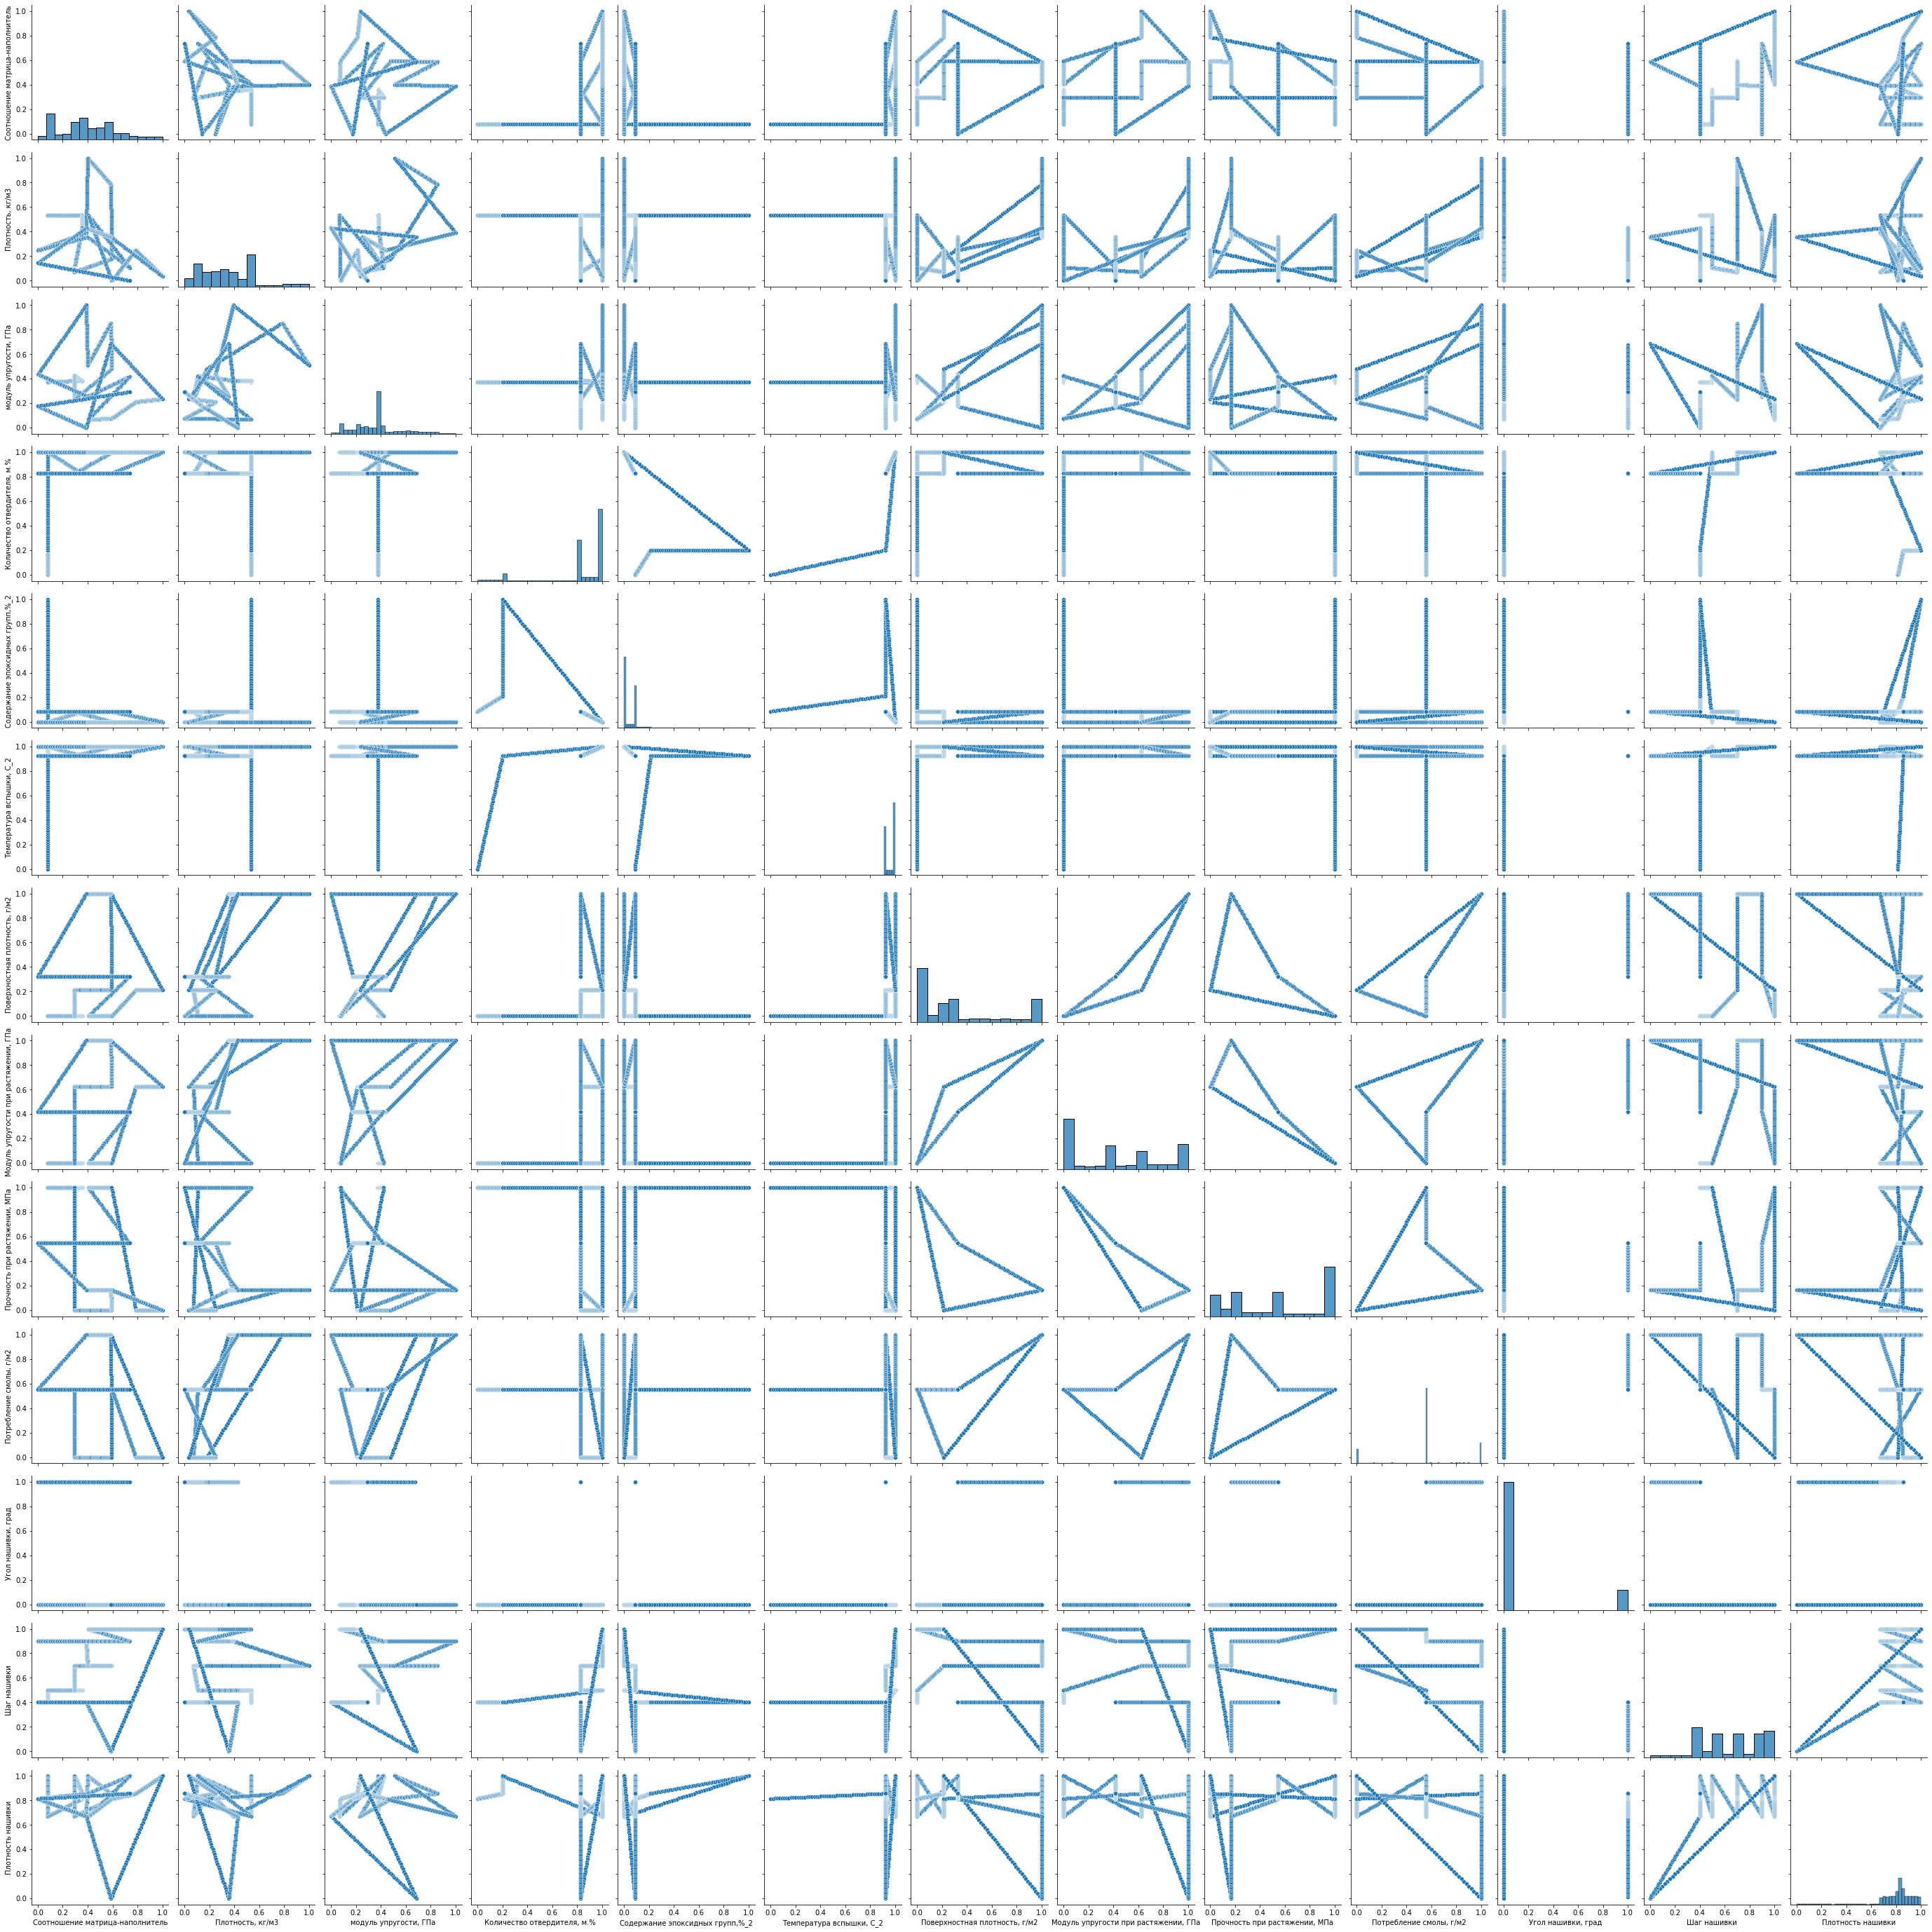

In [55]:
# Попарные графики рассеяния после нормализации
sns.pairplot(df_norm, height=3)

###### Построение матриц корреляции по Спирмену и Пирсону после нормализации

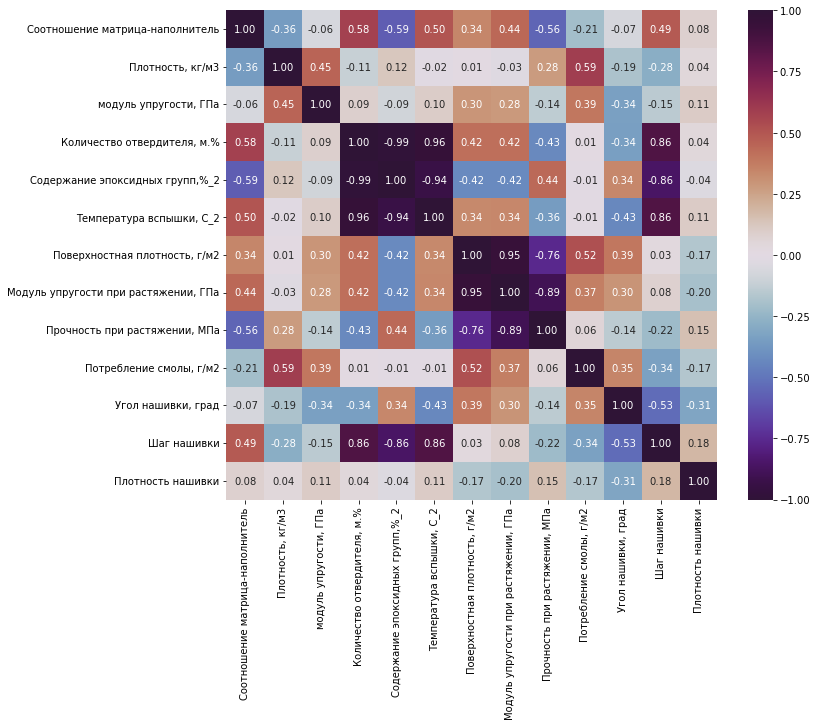

In [56]:
# Матрица корреляции по Спирмену после нормализации
corr = df_norm.corr(method = 'spearman') # Спирмен
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

In [57]:
# Параметр 'Угол нашивки, град' - категориальный, поэтому его исключаем 
# при построении матрицы корреляции по критерию Пирсона
df_dnorm=df_norm[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки']]
df_dnorm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
0,0.078481,0.535714,0.375079,0.000000,0.086626,0.000000,0.000,0.000000,1.000000,0.555556,0.4,0.814286
1,0.078481,0.535714,0.375079,0.004040,0.089149,0.018462,0.000,0.000000,1.000000,0.555556,0.4,0.815143
2,0.078481,0.535714,0.375079,0.008081,0.091672,0.036923,0.000,0.000000,1.000000,0.555556,0.4,0.816000
3,0.078481,0.535714,0.375079,0.012121,0.094195,0.055385,0.000,0.000000,1.000000,0.555556,0.4,0.816857
4,0.078481,0.535714,0.375079,0.016162,0.096717,0.073846,0.000,0.000000,1.000000,0.555556,0.4,0.817714
...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.677764,0.011429,0.283710,0.826869,0.086626,0.923077,0.325,0.416667,0.546296,0.555556,0.4,0.853714
1097,0.692498,0.008571,0.286044,0.826869,0.086626,0.923077,0.325,0.416667,0.546296,0.555556,0.4,0.854571
1098,0.707232,0.005714,0.288377,0.826869,0.086626,0.923077,0.325,0.416667,0.546296,0.555556,0.4,0.855429
1099,0.721966,0.002857,0.290710,0.826869,0.086626,0.923077,0.325,0.416667,0.546296,0.555556,0.4,0.856286


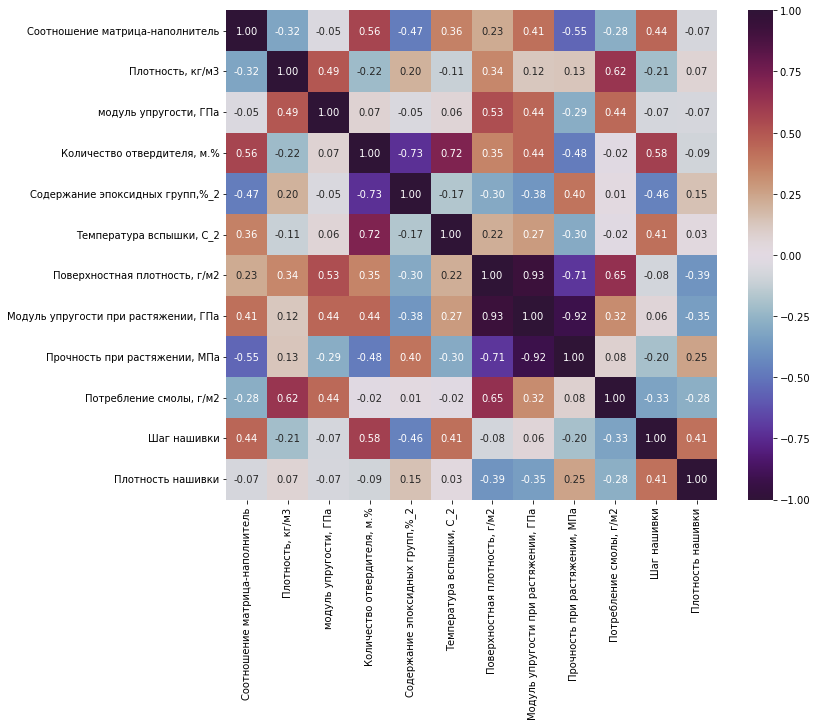

In [58]:
# Матрица корреляции по Пирсону после нормализации
corr = df_dnorm.corr() # Пирсон по умолчанию
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

Вывод: судя по матрицам корреляции, построенной на основании корреляции по Пирсону для количественных данных и Спирмена для количественных и категориальных данных, коэффициенты корреляции R
после нормализации параметров мало изменились

ОБЩИЙ ВЫВОД: После отбрасывания случайных чисел с нормальным распределением (начиная со строки с индексом 23) обработка методами статистики позволила выявить статистическую связь между рядом параметров датасета.

Связь между данными из двух разных файлов 'X_bp.xlsx' и 'X_nup.xlsx' в прослеживается уже гораздо лучше нежели при использовании полного датасета, но все равно нет полной уверенности, что она является является не случайной. Статистическими значимыми по критерию Колмогорова-Смирнова (для категориальных переменных) оказываются значимыми различия средних только для параметра 'Шаг нашивки', данные по которому находятся в том же файле 'X_nup.xlsx', что и данные 'Угол нашивки, град'. Поэтому сделан вывод, что соединение этих двух файлов осуществлено по произвольному принципу. Но, тем не менее, в файле 'X_bp.xlsx' имеются параметры связанные с изготовлением наполнителя к матрице - это параметр 'Соотношением матрица-наполнитель'. Параметр 'Соотношением матрица-наполнитель' позволит в дальнейшем, в какой-то степени компенсировать отсутствие адекватных данных, касающихся наполнителя из файла 'X_nup.xlsx'.


Было решено также отказаться от построения нелинейных регрессионных моделей, поскольку прослеживается линейная связь. Данные представляют собой результаты эксперимента по определению механических характеристик при испытании на растяжение, и существовует как минимум линейная зависимость между такими характеристиками, как 'модуль упругости, ГПа' или 'Модуль упругости при растяжении, ГПа' и 'Прочность при растяжении, МПа'.


Исходные данные включали в себя значительное количество искусственно сгенерированны случайных чисел с нормальным законом распределения. После удаления этих чисел из датасета выявлены статистически значимые корреляционные связи.

Но, поскольку количество данных после удаления случайных чисел является недостаточным для дальнейшего изучения, было принято решение дополнить датасет данными, полученными в результате интерполяции исходных данных.

После интерполяции наблюдается в целом сохранение значений коэффициентов корреляции R в матрицах корреляции